In [99]:
data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

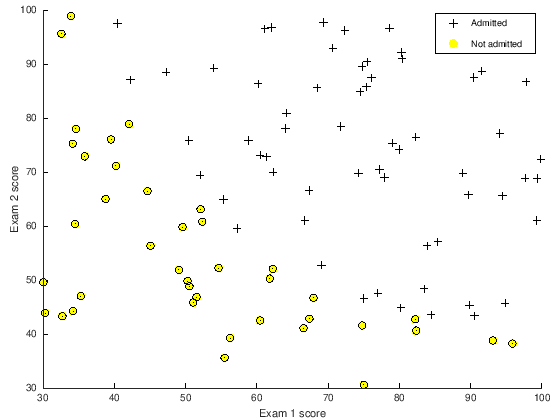

In [100]:
%% ==================== Part 1: Plotting ====================
plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [101]:
%% ============ Part 2: Compute Cost and Gradient ============

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

In [102]:
fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [103]:
%% ============= Part 3: Optimizing using fminunc  =============

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

In [104]:
% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


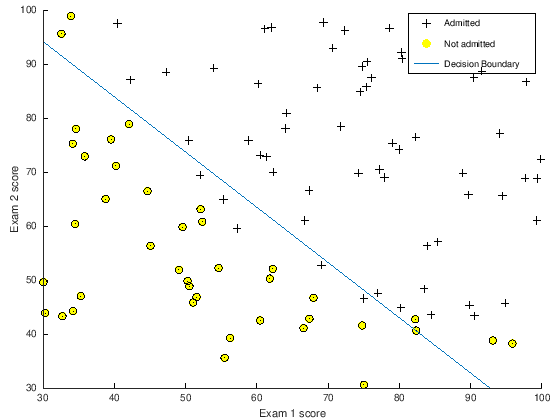

In [108]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [107]:
%% ============== Part 4: Predict and Accuracies ==============

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002



In [113]:
% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0

